In [41]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import keras 
import matplotlib.pyplot as plt 
import cv2
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import fashion_mnist
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from keras import regularizers

In [42]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

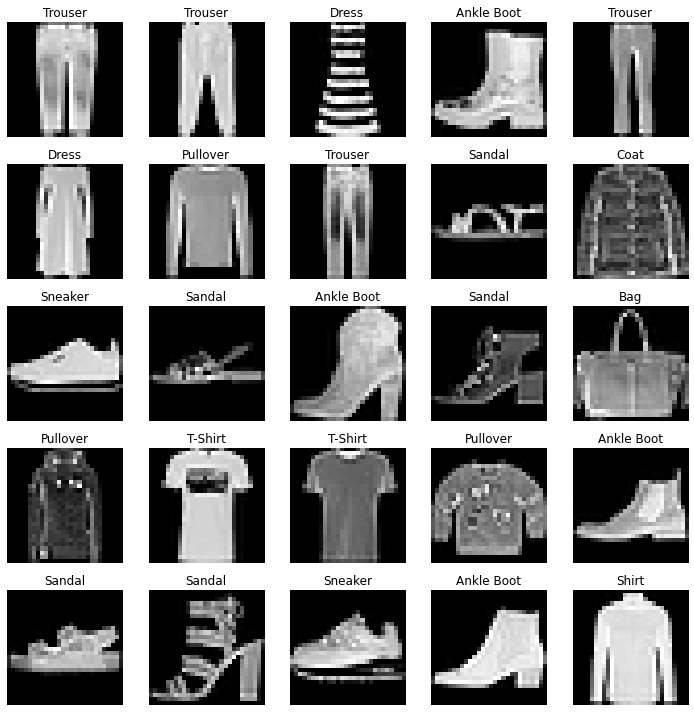

In [43]:
# Data visualization

labels = {0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
              5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}

W_grid = 5
L_grid = 5

fig = plt.figure(figsize=(10, 10))

for i in range(1,W_grid*L_grid+1) :
  random_image = np.random.randint(0,len(x_train))
  img = x_train[random_image]
  label = labels[y_train[random_image]]

  fig.add_subplot(W_grid,L_grid,i)
  plt.title(label)
  plt.imshow(img, cmap='gray')
  plt.axis('off')
plt.tight_layout()
plt.show()

In [44]:
num_classes=10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [45]:
# FIRST MODEL (SECOND MODEL IN ARTICLE)

model_1=keras.models.Sequential([
    
    keras.layers.Conv2D(filters=64, kernel_size=(2,2), strides=(1,1),
                        activation='relu', input_shape=(28,28,1),
                        padding="same"),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(filters=64, kernel_size=(2,2), strides=(1,1),
                        activation='relu', padding="same"),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),

    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.25),

    keras.layers.Dense(10,activation='softmax')  

])

In [46]:
model_1.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']    
)

In [47]:
history_1=model_1.fit(x_train, y_train, batch_size=128,
                  epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
469/469 [==============================] - 5s 9ms/step - loss: 1.4334 - accuracy: 0.6998 - val_loss: 0.4474 - val_accuracy: 0.8332
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.5015 - accuracy: 0.8153 - val_loss: 0.4114 - val_accuracy: 0.8503
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.4323 - accuracy: 0.8403 - val_loss: 0.3606 - val_accuracy: 0.8674
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.3938 - accuracy: 0.8523 - val_loss: 0.3526 - val_accuracy: 0.8727
Epoch 5/50
469/469 [==============================] - 4s 9ms/step - loss: 0.3657 - accuracy: 0.8637 - val_loss: 0.3381 - val_accuracy: 0.8804
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.3441 - accuracy: 0.8704 - val_loss: 0.3142 - val_accuracy: 0.8852
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.3236 - accuracy: 0.8771 - val_loss: 0.2948 - val_accuracy: 0.8938
Epoch 

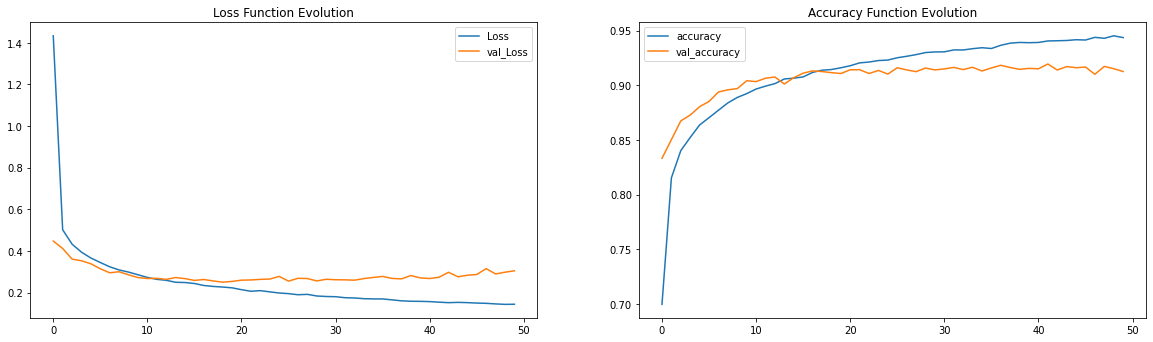

In [48]:
plt.figure(figsize=(20,25))

plt.subplot(4, 2, 1)
plt.plot(history_1.history['loss'], label='Loss')
plt.plot(history_1.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history_1.history['accuracy'], label='accuracy')
plt.plot(history_1.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

In [49]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model_1.predict(x_test),axis=1)
print('\naccuracy of first model = ',accuracy_score(y_test_arg, Y_pred),"\n")
print('recall of first model = ',recall_score(y_test_arg, Y_pred,average='macro'),'\n')
print('f1 of first model =',f1_score(y_test_arg, Y_pred,average='macro'),'\n')
print('precision of first model = ',precision_score(y_test_arg, Y_pred,average='macro'))

313/313 [==============================] - 1s 2ms/step

accuracy of first model =  0.9125 

recall of first model =  0.9125 

f1 of first model = 0.9127539079737715 

precision of first model =  0.914605176740233


313/313 [==============================] - 1s 2ms/step


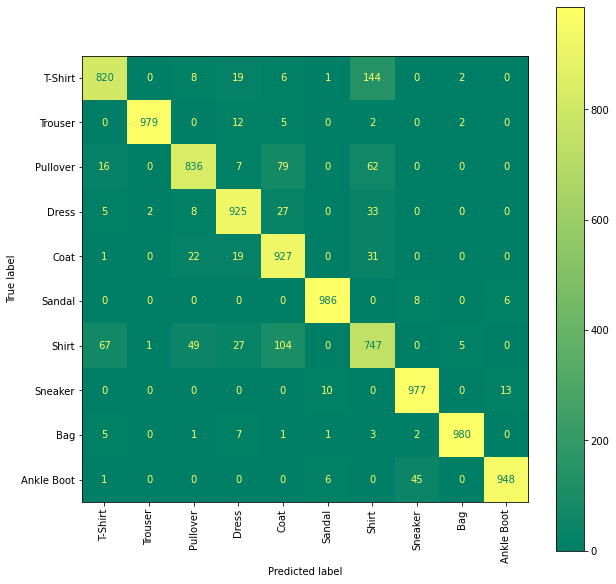

In [50]:
labels = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal','Shirt', 'Sneaker','Bag','Ankle Boot']

y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model_1.predict(x_test),axis=1)
cm = confusion_matrix(y_test_arg, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [51]:
# SECOND MODEL (FOURTH MODEL IN ARTICLE)

model_2=keras.models.Sequential([
    
    keras.layers.Conv2D(filters=64, kernel_size=(2,2), strides=(1,1),
                        activation='relu', input_shape=(28,28,1),
                        padding="same"),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(filters=64, kernel_size=(2,2), strides=(1,1),
                        activation='relu', padding="same"),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(filters=64, kernel_size=(2,2), strides=(1,1),
                        activation='relu', padding="same"),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(filters=64, kernel_size=(2,2), strides=(1,1),
                        activation='relu', padding="same"),
    keras.layers.Dropout(0.25),         

    keras.layers.Flatten(),

    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.25),

    keras.layers.Dense(10,activation='softmax')  

])

In [52]:
model_2.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']    
)

In [53]:
history_2=model_2.fit(x_train, y_train, batch_size=128,
                  epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
469/469 [==============================] - 5s 9ms/step - loss: 1.5896 - accuracy: 0.5213 - val_loss: 0.6328 - val_accuracy: 0.7678
Epoch 2/50
469/469 [==============================] - 4s 9ms/step - loss: 0.7176 - accuracy: 0.7285 - val_loss: 0.5171 - val_accuracy: 0.7991
Epoch 3/50
469/469 [==============================] - 4s 9ms/step - loss: 0.6038 - accuracy: 0.7700 - val_loss: 0.4616 - val_accuracy: 0.8293
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.5440 - accuracy: 0.7982 - val_loss: 0.4227 - val_accuracy: 0.8447
Epoch 5/50
469/469 [==============================] - 4s 9ms/step - loss: 0.4972 - accuracy: 0.8168 - val_loss: 0.3852 - val_accuracy: 0.8581
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.4650 - accuracy: 0.8312 - val_loss: 0.3608 - val_accuracy: 0.8688
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.4400 - accuracy: 0.8398 - val_loss: 0.3371 - val_accuracy: 0.8776
Epoch 

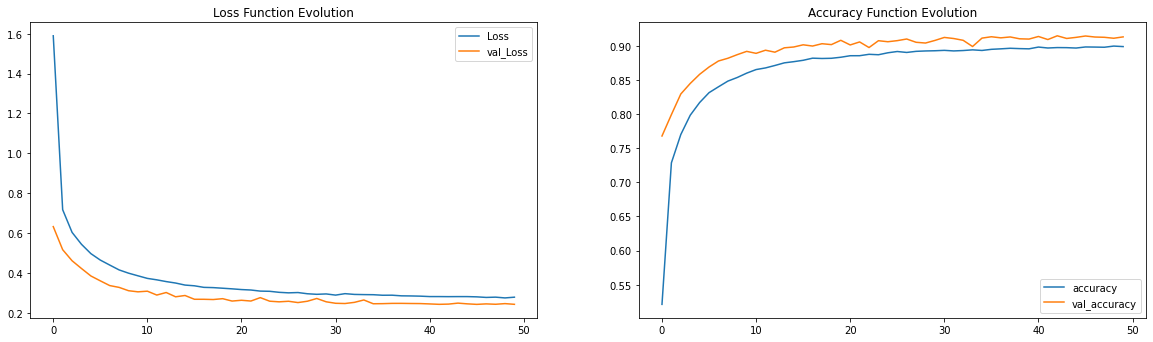

In [54]:
plt.figure(figsize=(20,25))

plt.subplot(4, 2, 1)
plt.plot(history_2.history['loss'], label='Loss')
plt.plot(history_2.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history_2.history['accuracy'], label='accuracy')
plt.plot(history_2.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

In [55]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model_2.predict(x_test),axis=1)
print('\naccuracy of second model = ',accuracy_score(y_test_arg, Y_pred),"\n")
print('recall of second model = ',recall_score(y_test_arg, Y_pred,average='macro'),'\n')
print('f1 of second model =',f1_score(y_test_arg, Y_pred,average='macro'),'\n')
print('precision of second model = ',precision_score(y_test_arg, Y_pred,average='macro'))

313/313 [==============================] - 1s 2ms/step

accuracy of second model =  0.9129 

recall of second model =  0.9128999999999999 

f1 of second model = 0.9118950664186928 

precision of second model =  0.9121472804099134


313/313 [==============================] - 1s 2ms/step


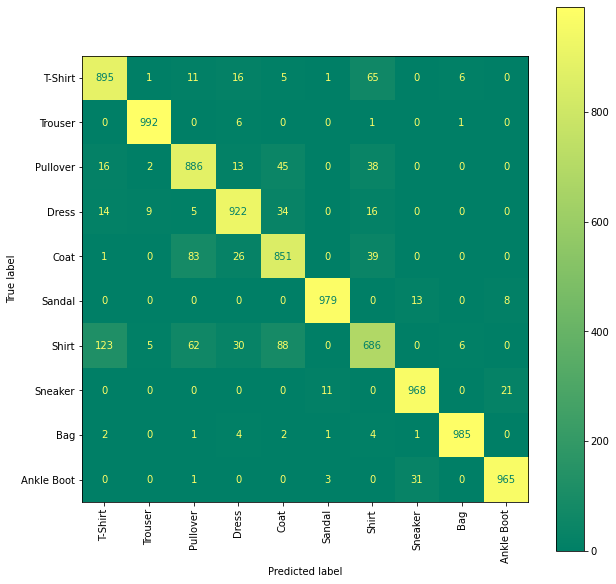

In [56]:
labels = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal','Shirt', 'Sneaker','Bag','Ankle Boot']
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model_2.predict(x_test),axis=1)
cm = confusion_matrix(y_test_arg, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()